In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

In [2]:
# Load World Bank Group Country's GDP
cols = ['Country Name', 'Country Code'] + [str(i) for i in range(2001,2018)]
gdp_csv_path = "Resources/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10312015.csv"
gdp_df = pd.read_csv(gdp_csv_path, skiprows=4, usecols=cols)
gdp_df = pd.melt(gdp_df, id_vars=["Country Name", "Country Code"], var_name="Year", value_name="GDP")

# Load Country Codes
country_csv_path = "Resources/Country/GFN Country code concordance table.csv"
country_df = pd.read_csv(country_csv_path)

# Merge World Bank Group's GDP with Country Codes
merged_gdp_df = pd.merge(gdp_df, country_df, how='left', left_on='Country Code', right_on='ISO Alpha-3 Code').fillna(0)
merged_gdp_df = merged_gdp_df[['GFN Country Code', 'Year', 'GDP']]
merged_gdp_df['GFN Country Code'] = merged_gdp_df['GFN Country Code'].apply(np.int64)
merged_gdp_df['Year'] = merged_gdp_df['Year'].apply(np.int64)
merged_gdp_df.head()

,GFN Country Code,Year,GDP
0,22,2001,1.920263e+09
1,2,2001,2.461666e+09
2,7,2001,8.936064e+09
3,3,2001,4.060759e+09
4,6,2001,1.496913e+09


In [3]:
# Set FAO stardand url parametrs
fao_area = 'area=' + '5000%3E%2C351' # All countries
fao_year = '&year=' + '%2C'.join(np.arange(2001,2019).astype(str))
fao_area_cs = '&area_cs=FAO'
fao_item_cs = '&item_cs=FAO'
fao_tail = '&show_codes=true&show_unit=true&show_flags=true&null_values=false&output_type=csv'

In [4]:
# Investment: Government Expenditure (Subsidies)
# Set url parametrs
fao_base_url = 'http://fenixservices.fao.org/faostat/api/v1/en/data/IG?'
element_str = '6107'
fao_element = '&element=' + element_str
item_str = '23164%2C23134' # Pull Agriculture General/Center Main
fao_item = '&item=' + item_str
# finalize fao url
ge_fao_url = fao_base_url + fao_area + fao_area_cs + fao_element + fao_item  + fao_item_cs + fao_year + fao_tail

# Request Get Investment: Government Expenditure Data from FOA
response = requests.get(ge_fao_url)
decoded_content = response.content.decode('ISO-8859-1')
# Store CSV to DataFrame
fao_ge_df = pd.read_csv(io.BytesIO(response.content), encoding='ISO-8859-1')
fao_ge_df.head()  # count = 968

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,IG,Government Expenditure,3,Albania,6167,"Value US$, 2010 prices",23134,Agriculture (General Government),2010,2010,millions,0.0,Qm,Official data from questionnaires and/or natio...,NaN
1,IG,Government Expenditure,3,Albania,6167,"Value US$, 2010 prices",23134,Agriculture (General Government),2011,2011,millions,0.0,Qm,Official data from questionnaires and/or natio...,NaN
2,IG,Government Expenditure,3,Albania,6167,"Value US$, 2010 prices",23134,Agriculture (General Government),2012,2012,millions,0.0,Qm,Official data from questionnaires and/or natio...,NaN
3,IG,Government Expenditure,3,Albania,6167,"Value US$, 2010 prices",23134,Agriculture (General Government),2013,2013,millions,0.0,Qm,Official data from questionnaires and/or natio...,NaN
4,IG,Government Expenditure,3,Albania,6167,"Value US$, 2010 prices",23134,Agriculture (General Government),2014,2014,millions,0.0,Qm,Official data from questionnaires and/or natio...,NaN


In [11]:
ge_fao_url

'http://fenixservices.fao.org/faostat/api/v1/en/data/IG?area=231&area_cs=FAO&element=6107&item=23166%2C23136%2C23165%2C23135&item_cs=FAO&year=2001%2C2002%2C2003%2C2004%2C2005%2C2006%2C2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016%2C2017%2C2018&show_codes=true&show_unit=true&show_flags=true&null_values=false&output_type=csv'

In [5]:
# Investment: Government Expenditure (Subsidies) for USA
# Set url parametrs
fao_base_url = 'http://fenixservices.fao.org/faostat/api/v1/en/data/IG?'
fao_area = 'area=' + '231'
element_str = '6107'
fao_element = '&element=' + element_str
item_str = '23166%2C23136%2C23165%2C23135' # Pull Agriculture General/Center Subs: Recurrent + Capital
fao_item = '&item=' + item_str
# finalize fao url
ge_fao_url = fao_base_url + fao_area + fao_area_cs + fao_element + fao_item  + fao_item_cs + fao_year + fao_tail

# Request Get Investment: Government Expenditure Data from FOA
response = requests.get(ge_fao_url)
decoded_content = response.content.decode('ISO-8859-1')
# Store CSV to DataFrame
usa_fao_ge_df = pd.read_csv(io.BytesIO(response.content), encoding='ISO-8859-1')
usa_fao_ge_df.head()  

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,IG,Government Expenditure,231,United States of America,6167,"Value US$, 2010 prices",23135,"Agriculture, Recurrent (General Government)",2001,2001,millions,44475.09,Qm,Official data from questionnaires and/or natio...,NaN
1,IG,Government Expenditure,231,United States of America,6167,"Value US$, 2010 prices",23135,"Agriculture, Recurrent (General Government)",2002,2002,millions,33209.09,Qm,Official data from questionnaires and/or natio...,NaN
2,IG,Government Expenditure,231,United States of America,6167,"Value US$, 2010 prices",23135,"Agriculture, Recurrent (General Government)",2003,2003,millions,36177.58,Qm,Official data from questionnaires and/or natio...,NaN
3,IG,Government Expenditure,231,United States of America,6167,"Value US$, 2010 prices",23135,"Agriculture, Recurrent (General Government)",2004,2004,millions,31120.59,Qm,Official data from questionnaires and/or natio...,NaN
4,IG,Government Expenditure,231,United States of America,6167,"Value US$, 2010 prices",23135,"Agriculture, Recurrent (General Government)",2005,2005,millions,42364.69,Qm,Official data from questionnaires and/or natio...,NaN


In [6]:
# Filter out Values = 0 & unnecessary columns : Count = 968, 32
fao_ge_df = fao_ge_df[fao_ge_df['Value'] > 0]
fao_ge_df = fao_ge_df[['Area Code','Area', 'Year', 'Item', 'Value']]
usa_fao_ge_df = usa_fao_ge_df[usa_fao_ge_df['Value'] > 0]
usa_fao_ge_df = usa_fao_ge_df[['Area Code','Area', 'Year', 'Item', 'Value']]

In [7]:
# merge dataframes: add GDP to fao_ge_df 
merged_ge_df = pd.merge(fao_ge_df, merged_gdp_df, how='left', left_on=['Area Code','Year'], right_on=['GFN Country Code','Year']).fillna(0)
# Filter out unused columns
merged_ge_df = merged_ge_df[['Area','Year','Item','Value','GDP']]
# Filter out GDP values with 0 or negative
merged_ge_df = merged_ge_df[merged_ge_df['GDP'] > 0]

# merge dataframes: add GDP to usa_fao_ge_df
merged_usa_ge_df = pd.merge(usa_fao_ge_df, merged_gdp_df, how='left', left_on=['Area Code','Year'], right_on=['GFN Country Code','Year']).fillna(0)
# Filter out unused columns
merged_usa_ge_df = merged_usa_ge_df[['Area','Year','Item','Value','GDP']]
# Filter out GDP values with 0 or negative
merged_usa_ge_df = merged_usa_ge_df[merged_usa_ge_df['GDP'] > 0]

In [8]:
merged_ge_df.head()

,Area,Year,Item,Value,GDP
0,Angola,2001,Agriculture (General Government),107.99,8.936064e+09
1,Angola,2002,Agriculture (General Government),67.29,1.249735e+10
2,Angola,2003,Agriculture (General Government),89.57,1.418895e+10
3,Angola,2004,Agriculture (General Government),147.22,1.964085e+10
4,Angola,2005,Agriculture (General Government),218.37,2.823371e+10


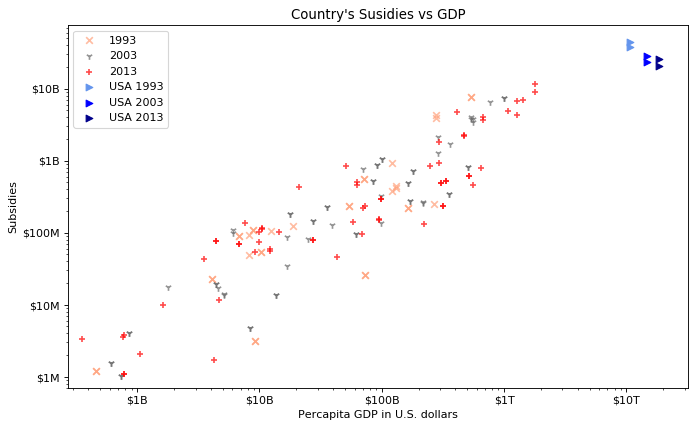

In [9]:
# Plot Scatter
# Set plots by years 1 decade apart
merged_mc2001_df = merged_ge_df[merged_ge_df['Year']==2001]
merged_mc2008_df = merged_ge_df[merged_ge_df['Year']==2008]
merged_mc2016_df = merged_ge_df[merged_ge_df['Year']==2016]
# Set x_axis & y_axis by Years
x_axis_1993 = merged_mc2001_df['GDP']/1000000 # Convert to Million based
y_axis_1993 = merged_mc2001_df['Value'] # Is already set to Million based
x_axis_2003 = merged_mc2008_df['GDP']/1000000
y_axis_2003 = merged_mc2008_df['Value']
x_axis_2013 = merged_mc2016_df['GDP']/1000000
y_axis_2013 = merged_mc2016_df['Value']

merged_usa_ge2001_df = merged_usa_ge_df[merged_usa_ge_df['Year']==2001]
merged_usa_ge2008_df = merged_usa_ge_df[merged_usa_ge_df['Year']==2008]
merged_usa_ge2016_df = merged_usa_ge_df[merged_usa_ge_df['Year']==2016]
# Set USA x_axis & y_axis
x_axis_1993_USA = merged_usa_ge2001_df['GDP']/1000000
y_axis_1993_USA = merged_usa_ge2001_df['Value']
x_axis_2003_USA = merged_usa_ge2008_df['GDP']/1000000
y_axis_2003_USA = merged_usa_ge2008_df['Value']
x_axis_2013_USA = merged_usa_ge2016_df['GDP']/1000000
y_axis_2013_USA = merged_usa_ge2016_df['Value']

# Plot scatters
fig = plt.figure(num=None, figsize=(10, 6), dpi=80)
ax = plt.gca()
plt.scatter(x_axis_1993, y_axis_1993, alpha=0.7, label='1993', marker='x', color='lightsalmon')
plt.scatter(x_axis_2003, y_axis_2003, alpha=0.7, label='2003', marker='1', color='dimgrey')
plt.scatter(x_axis_2013, y_axis_2013, alpha=0.7, label='2013', marker='+', color='red')
plt.scatter(x_axis_1993_USA, y_axis_1993_USA, alpha=1.0, label='USA 1993', marker='>', color='cornflowerblue')
plt.scatter(x_axis_2003_USA, y_axis_2003_USA, alpha=1.0, label='USA 2003', marker='>', color='blue')
plt.scatter(x_axis_2013_USA, y_axis_2013_USA, alpha=1.0, label='USA 2013', marker='>', color='darkblue')

ax.set_xscale('log')
ax.set_yscale('log')
plt.xticks([10**3,10**4,10**5,10**6,10**7], ['$1B','$10B','$100B','$1T','$10T'])
plt.yticks([10**0,10**1,10**2,10**3,10**4], ['$1M','$10M','$100M','$1B','$10B'])
# Set Labels
plt.title("Country's Susidies vs GDP")
plt.xlabel('Percapita GDP in U.S. dollars')
plt.ylabel('Subsidies')
#plt.yticks([0,10,20,30,40,50,60,70,80], ['0','10','20','30','40','50','60','70','80g'])
plt.legend(loc='upper left')
#plt.savefig('img/Scatter_Subsidies.png')
plt.show()